In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as matlib

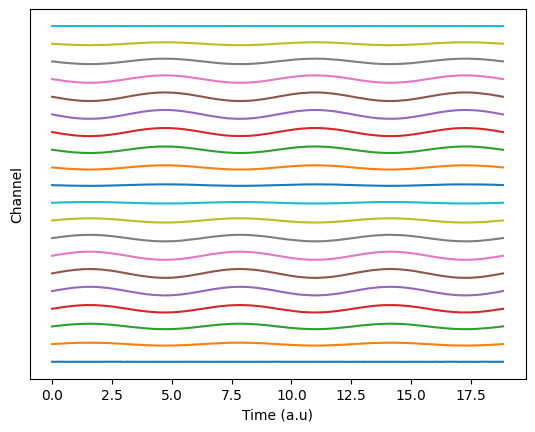

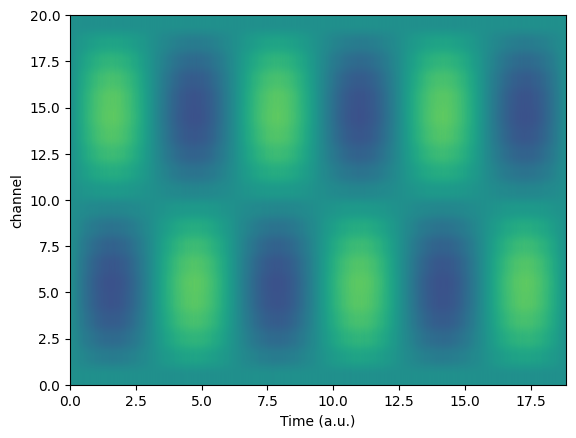

In [26]:
## simulate data

# simulation parameters
N = 1000 # time points
M = 20 # channels

# thime vector 
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]

data =data + np.random.randn(M,N)*.01

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)

plt.yticks([])
plt.xlabel('Time (a.u)')
plt.ylabel('Channel')
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('channel')
plt.show()

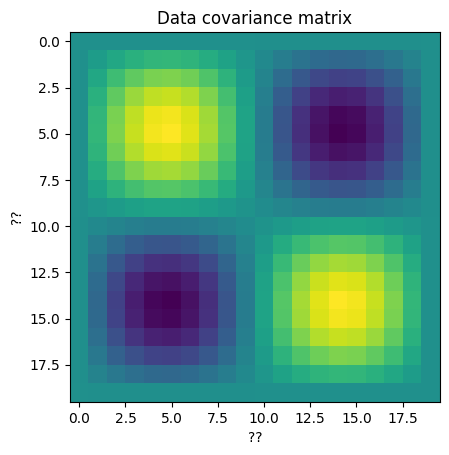

In [30]:
## now computethe covariance matrix

# note the size of the output!
dataCovMat = np.cov(data)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5)
plt.title('Data covariance matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

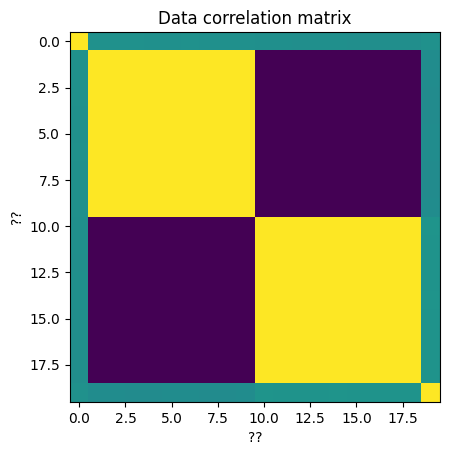

In [28]:
## and now the correlation matrix

# note the size of the output!
dataCornMat = np.corrcoef(data)

plt.imshow(dataCornMat,vmin=-.5,vmax=.5)
plt.title('Data correlation matrix')
plt.xlabel('??')
plt.ylabel('??')
plt.show()

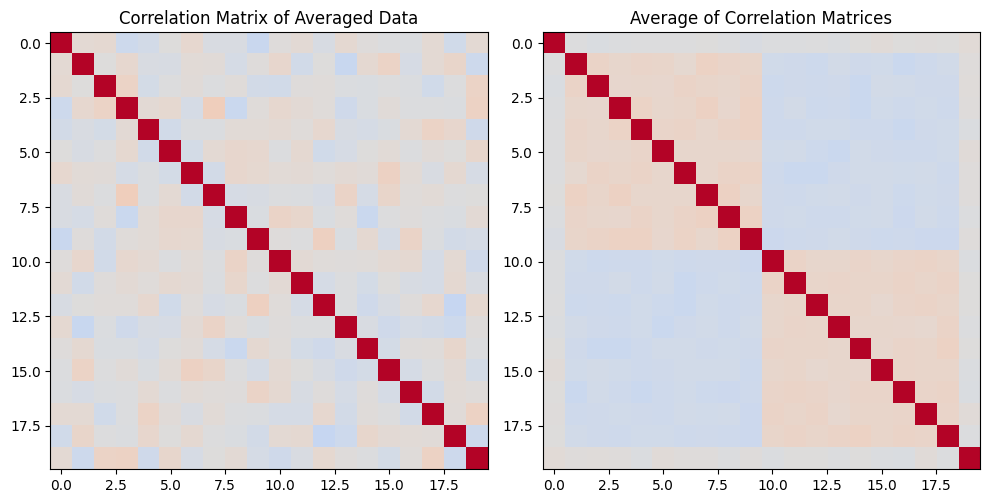

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션 파라미터 설정
N = 1000  # 시간 포인트 수
M = 20  # 채널 수

# 시간 벡터 (라디안 단위) 생성
t = np.linspace(0, 6 * np.pi, N)  # 0에서 6π까지의 값을 1000개의 시간 포인트로 나눈 배열

# 채널 간의 관계를 나타내는 사인파 생성 (공분산을 반영)
chanrel = np.sin(np.linspace(0, 2 * np.pi, M))  # 0에서 2π까지의 값을 20개의 채널로 나눈 배열을 사인파로 변환

# 노이즈 생성 (0.00001에서 3700까지 20개의 노이즈 레벨)
noise = np.linspace(0.00001, 3700, 20)

# 데이터셋과 상관행렬을 저장할 리스트 초기화
data_list = []  # 각 노이즈가 추가된 데이터를 저장할 리스트
corr_matrices = []  # 각 데이터셋에 대한 상관행렬을 저장할 리스트

# 기본 데이터 초기화
data = np.zeros((M, N))  # 20개의 채널과 1000개의 시간 포인트를 가진 0으로 채워진 배열 생성
for mi in range(M):  # 각 채널에 대해
    data[mi, :] = np.sin(t) * chanrel[mi]  # 시간에 따른 사인파와 채널 관계를 곱해 데이터 생성

# 노이즈가 다른 20개의 데이터셋 생성 및 상관행렬 계산
for idx, n in enumerate(noise):  # 각 노이즈 레벨에 대해
    noisy_data = data + np.random.randn(M, N) * n  # 데이터에 랜덤 노이즈 추가
    data_list.append(noisy_data)  # 노이즈가 추가된 데이터를 리스트에 저장
    corr_matrices.append(np.corrcoef(noisy_data))  # 노이즈가 추가된 데이터의 상관행렬을 계산하여 리스트에 저장

# 첫 번째 방식: 모든 데이터셋을 평균화한 후 상관행렬 계산
data_mean = np.mean(data_list, axis=0)  # 각 데이터셋을 평균화하여 하나의 평균 데이터셋 생성
corr_mat = np.corrcoef(data_mean)  # 평균화된 데이터셋의 상관행렬 계산

# 두 번째 방식: 각 데이터셋의 상관행렬을 평균화
corr_mean = np.mean(corr_matrices, axis=0)  # 각 데이터셋에 대한 상관행렬을 평균화

# 결과 시각화 (2개의 상관행렬을 나란히 보여줌)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 두 개의 플롯을 가로로 나란히 배치

# 첫 번째 방식: 평균화된 데이터의 상관행렬을 시각화
ax[0].imshow(corr_mat, vmin=-0.5, vmax=0.5, cmap='coolwarm')  # 상관행렬을 색상으로 표시
ax[0].set_title('Correlation Matrix of Averaged Data')  # 첫 번째 플롯의 제목 설정

# 두 번째 방식: 상관행렬의 평균을 시각화
ax[1].imshow(corr_mean, vmin=-0.5, vmax=0.5, cmap='coolwarm')  # 상관행렬 평균을 색상으로 표시
ax[1].set_title('Average of Correlation Matrices')  # 두 번째 플롯의 제목 설정

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 플롯 출력

Original Covariance Matrix (C):
[[ 0.45587377 -0.11423061  0.12093075  0.05016944]
 [-0.11423061  0.77792034  0.27320014  0.34438653]
 [ 0.12093075  0.27320014  1.30989631 -0.02314147]
 [ 0.05016944  0.34438653 -0.02314147  1.28821713]]

Calculated Covariance Matrix (σ * R * σ):
[[ 0.41028639 -0.10280754  0.10883767  0.04515249]
 [-0.10280754  0.70012831  0.24588012  0.30994788]
 [ 0.10883767  0.24588012  1.17890668 -0.02082732]
 [ 0.04515249  0.30994788 -0.02082732  1.15939542]]

Difference between original and calculated covariance matrices:
[[ 0.04558738 -0.01142306  0.01209307  0.00501694]
 [-0.01142306  0.07779203  0.02732001  0.03443865]
 [ 0.01209307  0.02732001  0.13098963 -0.00231415]
 [ 0.00501694  0.03443865 -0.00231415  0.12882171]]


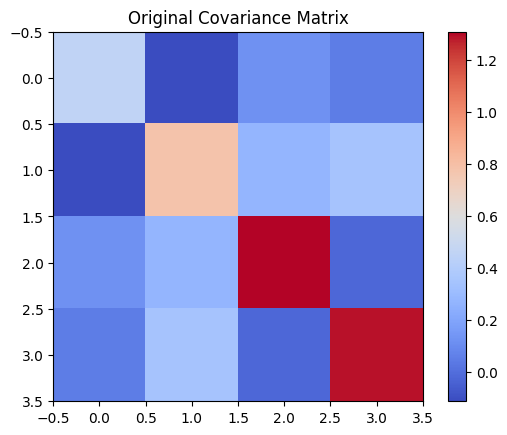

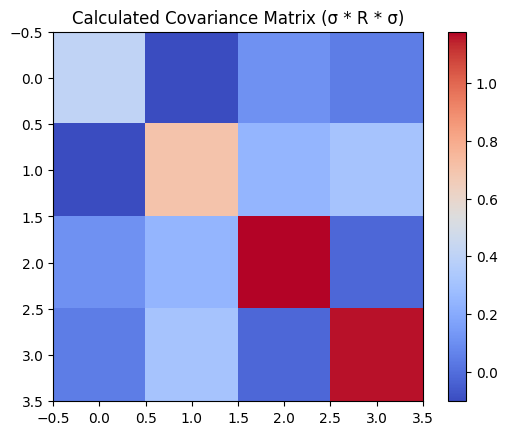

In [48]:
import numpy as np
import matplotlib.pyplot as plt

n = 4  # 변수의 수
st = 10  # 관측값(샘플)의 수
results = np.zeros((st, n))  # 결과를 저장할 배열

# 10개의 샘플에 대해 4개의 랜덤 변수를 생성
for i in range(st):
    results[i] = np.random.randn(n)

# 데이터 전치 (변수가 행에 위치하도록)
results_transposed = results.T

# 공분산 행렬과 상관행렬 계산
c = np.cov(results_transposed)
cor = np.corrcoef(results_transposed)

# 각 변수의 표준편차 계산
std_devs = np.std(results_transposed, axis=1)

# 표준편차 대각행렬 생성
sigma = np.diag(std_devs)

# 수식 C = σ * R * σ 구현
c_calculated = sigma @ cor @ sigma

# 공분산 행렬과 수식을 통해 계산된 행렬 비교
print("Original Covariance Matrix (C):")
print(c)
print("\nCalculated Covariance Matrix (σ * R * σ):")
print(c_calculated)

# 두 행렬이 같은지 확인 (차이가 거의 없음을 확인)
print("\nDifference between original and calculated covariance matrices:")
print(c - c_calculated)

# 공분산 행렬 시각화
plt.imshow(c, cmap='coolwarm')
plt.colorbar()
plt.title("Original Covariance Matrix")
plt.show()

# 수식으로 계산된 공분산 행렬 시각화
plt.imshow(c_calculated, cmap='coolwarm')
plt.colorbar()
plt.title("Calculated Covariance Matrix (σ * R * σ)")
plt.show()

(10,)

0.0